<a href="https://colab.research.google.com/github/PrasunDatta/Detection-of-Covid-19-from-Chest-Radiographs/blob/main/(Pras)WaveletFeatureEextraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy
import glob
import pylab as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
from skimage import io, color
from numpy import save
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# # //This code snippet will first make a directory to save the corresponding ".npz" of each image.Hence here it will
# # //create 3 folder under the MergedDataset Folder.Then in the corresponding folder it will sequentially save the
# # //feature matrix for each image.
# folders = glob.glob('/content/drive/My Drive/final_dataset/*')
# imagesall = []
# for folder in folders:
#   # p = folder + '_npy'
#   # os.mkdir(p)
#   imagesall = glob.glob(folder + '/*')
#   print(imagesall)
#   break
#   # for k in range(len(imagesall)):
#   #   # //do some preprocessing on the image 
#   #   image = cv2.imread(imagesall[k])
#   #   image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   #   image = cv2.resize(image, (224, 224))
#   #   image = np.float32(image)
#   #   image /= 255
#   #   # //Calculate the feature matrix using the wavelet transform 
#   #   coeffs2 = pywt.dwt2(image, 'haar')
#   #   coeffs2 = np.array(coeffs2)
#   #   # //Save the feature matrix in the form of".npy" file
#   #   np.save(os.path.join(p , str(k)+ '_jpg') ,coeffs2)

In [ ]:
# # //Here is the following code snippet to visualize the wavelet transform of a specific sample image.
# # //We have here implemented wavelet transform utilizing "Haar" method generally used For x-ray images.

# import numpy as np
# import matplotlib.pyplot as plt
# import pywt
# import pywt.data
# import cv2
# # //Reading the image And doing some preprocessing

# image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = cv2.resize(image, (224, 224))
# image = np.float32(image)
# image /= 255
# # Wavelet transform of image, and plot approximation and details
# titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
# coeffs2 = pywt.dwt2(image, 'haar')
# LL, (LH, HL, HH) = coeffs2

# print ('Approximation detail is:'+ str(LL))
# print ('Horizontal detail :'+ str(LH))
# print('Vertical Detail:' + str(HL))
# print ('Diagonal Detail:' + str(HH))

# # //Visulizing the extracted features along diggerent dimensions/directions

# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()

In [ ]:
# image = cv2.imread('/content/drive/My Drive/Abar_ dataset/covid/covid_100.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = cv2.resize(image, (224, 224))
image = np.float32(image)
image /= 255
# coeffs2 = pywt.dwt2(image, 'haar')
# #coeffs = pywt.wavedec2(image,'haar')
# #arr, coeff_slices = pywt.coeffs_to_array(coeffs)
# # arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs2)
# LL, (LH, HL, HH) = coeffs2
# #arr.shape

In [ ]:
CovidCoeff =[]
imagesall = glob.glob("/content/drive/My Drive/(Prasun)AllCodes&Results/CovPre/*")
print(len(imagesall))
for k in range(len(imagesall)):
    # if k==22:
    #   continue
    # else:
      image = cv2.imread("/content/drive/My Drive/(Prasun)AllCodes&Results/CovPre/"+"covid_{}".format(k+1))

      print("/content/drive/My Drive/Abar_ dataset/covid/"+"covid_{}.jpg".format(k+1))

      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image = cv2.resize(image,(224,224))
      image = np.float32(image)
      image /= 255
      coeffs2 = pywt.dwt2(image, 'haar')
      LL, (LH, HL, HH) = coeffs2
      LLflatten = LL.flatten()
      LHflatten = LH.flatten()
      HLflatten = HL.flatten()
      HHflatten = HH.flatten()
      total  = np.append(LLflatten,LHflatten)
      total1 = np.append(total ,HLflatten )
      total2 = np.append(total1,HHflatten)

      CovidCoeff.append(total2)

236
/content/drive/My Drive/Abar_ dataset/covid/covid_1.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_2.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_3.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_4.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_5.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_6.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_7.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_8.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_9.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_10.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_11.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_12.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_13.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_14.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_15.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_16.jpg
/content/drive/My Drive/Abar_ dataset/covid/covid_17.jpg
/content/drive/My Drive/Abar_ datase

In [ ]:
print(len(CovidCoeff))

236


In [ ]:
CovidCoeff = np.reshape(CovidCoeff ,(236,50176))

In [ ]:
PneuCoeff =[]
imagesall = glob.glob("/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/*")
for k in range(len(imagesall)):

    image = cv2.imread("/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/"+"pneumonia_{}".format(k+1))
    print("/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/"+"pneumonia_{}".format(k+1))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2
    LLflatten = LL.flatten()
    LHflatten = LH.flatten()
    HLflatten = HL.flatten()
    HHflatten = HH.flatten()
    total  = np.append(LLflatten,LHflatten)
    total1 = np.append(total ,HLflatten )
    total2 = np.append(total1,HHflatten)  
      
    PneuCoeff.append(total2)

/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_1
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_2
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_3
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_4
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_5
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_6
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_7
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_8
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_9
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_10
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_11
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre/pneumonia_12
/content/driv

In [ ]:
len( PneuCoeff)

390

In [ ]:
PneuCoeff = np.reshape(PneuCoeff ,(390,50176))

In [ ]:
NormalCoeff =[]
# imagesall = glob.glob("/content/drive/My Drive/Abar_ dataset/normal/*")
imagesall = glob.glob('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/*')
for k in range(len(imagesall)):
    # image = cv2.imread("/content/drive/My Drive/Abar_ dataset/normal/"+"normal_{}.jpg".format(k+1))
    image = cv2.imread('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/' + 'normal_{}'.format(k+1))
    
    # print("/content/drive/My Drive/Abar_ dataset/normal/"+"normal_{}.jpg".format(k+1))
    print('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/' + 'normal_{}'.format(k+1))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224,224))
    image = np.float32(image)
    image /= 255
    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2
    LLflatten = LL.flatten()
    LHflatten = LH.flatten()
    HLflatten = HL.flatten()
    HHflatten = HH.flatten()
    total  = np.append(LLflatten,LHflatten)
    total1 = np.append(total ,HLflatten )
    total2 = np.append(total1,HHflatten)    
    NormalCoeff.append(total2)

/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_1
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_2
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_3
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_4
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_5
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_6
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_7
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_8
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_9
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_10
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_11
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre/normal_12
/content/drive/Shared drives/COVID_19/PrasunAll_Materials/tes

In [ ]:
print(len(NormalCoeff))

234


In [ ]:
NormalCoeff = np.reshape(NormalCoeff ,(234,50176))

In [ ]:
Coviddf = pd.DataFrame(CovidCoeff)
Coviddf.to_csv('/content/drive/My Drive/(Prasun)AllCodes&Results/CovWave - Sheet1.csv', index =False)

In [ ]:
Normaldf = pd.DataFrame(NormalCoeff)
Normaldf.to_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorWave - Sheet1.csv', index =False)

In [ ]:
pneudf = pd.DataFrame(PneuCoeff)
pneudf.to_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuWave - Sheet1.csv',index = False)

In [ ]:
# covidindexs = []
# imagesall = glob.glob("/content/drive/My Drive/final_dataset/CovidPreprocessedImage/*")
# for k in range(len(imagesall)):
#   index = 'covid_{}'.format(k)
#   covidindexs.append(index)
# #print(covidindexs) 

# normalindexs = []
# imagesall = glob.glob("/content/drive/My Drive/final_dataset/NormalPreprocessedImage/*")
# for k in range(len(imagesall)):
#   index = 'normal_{}'.format(k)
#   normalindexs.append(index)

In [ ]:
Coviddf = pd.DataFrame(CovidCoeff)
Coviddf.to_csv('/content/drive/My Drive/(Prasun)AllCodes&Results/TestCovPre.csv' ,index =False)
# Coviddf.to_csv('/content/drive/My Drive/(Prasun)AllCodes&Results/Cov10Prepro - Sheet1.csv', index =False)
# Coviddf = pd.read_csv('/content/drive/My Drive/final_dataset/CovidPreprocess.csv')
# Normaldf = pd.read_csv('/content/drive/My Drive/final_dataset/NormalPreprocess.csv')

In [ ]:
Pneudf = pd.DataFrame(PneuCoeff)
Pneudf.to_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuWave - Sheet1.csv', index =False)

In [ ]:
print(Pneudf)

     0      1      2      3      4      ...  50171  50172  50173  50174  50175
0     18.5   16.0   43.0   65.0   62.0  ...   -2.5    0.5    0.5    0.0    1.0
1     11.0    9.5   45.5   25.0   37.0  ...    5.0    1.5   -1.0    1.5    7.0
2     16.5    8.0   11.0   12.0    8.5  ...   -4.0    1.5    0.5    2.5   -2.0
3      0.0    0.0    0.0    0.0    0.0  ...    9.0   13.5    0.5   -3.5   -1.5
4      5.5    7.0   15.5   17.5   14.0  ...    0.0    0.0    0.0    0.0    0.0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
195   40.5   38.5   17.5   14.5   16.0  ...    1.0    0.5   -1.5   -3.5    6.5
196   65.0  183.0   50.0  205.0  108.5  ...    0.5   -0.5    0.0    0.0    0.0
197    2.0    6.5   22.0  138.5  146.5  ...    0.0    0.0    0.0    0.0    0.0
198   10.0    4.5   35.5   34.0   29.5  ...    7.5    2.0    0.5    0.0   -0.5
199    6.0   11.5   50.5   14.0   26.5  ...    0.5    0.0    0.0    0.0    0.0

[200 rows x 50176 columns]


In [ ]:
CNNCoviddf =pd.read_csv("/content/drive/My Drive/final_dataset/CNNcovidfeature.csv")
#print(CNNCoviddf)
CNNCoviddf = CNNCoviddf.drop(columns=['Unnamed: 0'])

In [ ]:
print(CNNCoviddf)

            0         1    2         3  ...  50172     50173      50174     50175
0    0.000066  0.032173  0.0  0.011439  ...    0.0  0.000000   1.214023  0.000000
1    0.000000  0.000000  0.0  0.000000  ...    0.0  2.096105   5.954577  0.000000
2    0.000000  0.000000  0.0  0.018216  ...    0.0  3.283184   4.058577  0.000000
3    0.000000  0.000000  0.0  0.000000  ...    0.0  3.952179   2.684035  0.000000
4    0.000000  0.011882  0.0  0.001277  ...    0.0  0.000000   3.632239  0.000000
..        ...       ...  ...       ...  ...    ...       ...        ...       ...
182  0.000000  0.000000  0.0  0.000000  ...    0.0  1.675738   1.116205  0.000000
183  0.000000  0.000000  0.0  0.000000  ...    0.0  2.934590   3.047397  3.565028
184  0.000000  0.000000  0.0  0.000000  ...    0.0  0.771862   0.000000  1.588662
185  0.000000  0.000000  0.0  0.000000  ...    0.0  4.602553  13.223021  5.271709
186  0.000000  0.000000  0.0  0.000000  ...    0.0  3.257656   6.970351  0.000000

[187 rows x 501

In [ ]:
CNNNormaldf =pd.read_csv("/content/drive/My Drive/final_dataset/CNNnormalfeature.csv")
#print(CNNNormaldf)
CNNNormaldf = CNNNormaldf.drop(columns=['Unnamed: 0'])

In [ ]:
print(CNNNormaldf)

             0    1         2         3  ...     50172     50173     50174     50175
0     0.000000  0.0  0.000000  0.000000  ...  0.000000  0.906729  0.000000  0.000000
1     0.000000  0.0  0.000000  0.007448  ...  0.000000  1.089756  0.000000  0.000000
2     0.000000  0.0  0.000000  0.000000  ...  0.000000  0.591929  1.137079  0.000000
3     0.000698  0.0  0.000000  0.009772  ...  1.060648  3.740096  3.773620  2.796393
4     0.000000  0.0  0.000000  0.000094  ...  0.000000  0.000000  0.000000  0.378787
...        ...  ...       ...       ...  ...       ...       ...       ...       ...
1095  0.000000  0.0  0.000000  0.000000  ...  0.000000  6.592725  0.000000  0.000000
1096  0.000000  0.0  0.014787  0.000000  ...  0.000000  1.646161  5.353610  0.000000
1097  0.000000  0.0  0.000000  0.000000  ...  0.000000  0.000000  2.197974  0.000000
1098  0.000000  0.0  0.000000  0.000000  ...  0.000000  0.000000  4.008609  0.000000
1099  0.000000  0.0  0.000000  0.000000  ...  0.000000  0.000000 

In [ ]:
MergedCovid = pd.concat([ CNNCoviddf ,Coviddf ] ,axis = 1)
print(MergedCovid)

            0         1    2         3    4  ...  50171  50172  50173  50174  50175
0    0.000066  0.032173  0.0  0.011439  0.0  ...   15.0   -7.5   -4.0   -9.0   17.5
1    0.000000  0.000000  0.0  0.000000  0.0  ...    1.0    0.0    0.0    0.0    0.0
2    0.000000  0.000000  0.0  0.018216  0.0  ...    0.0    5.5    3.5  -10.5  103.0
3    0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0    0.0
4    0.000000  0.011882  0.0  0.001277  0.0  ...    0.0    0.0    0.0    0.0    0.0
..        ...       ...  ...       ...  ...  ...    ...    ...    ...    ...    ...
182  0.000000  0.000000  0.0  0.000000  0.0  ...   -4.0   10.5   -4.5   -0.5    8.0
183  0.000000  0.000000  0.0  0.000000  0.0  ...  -11.5    3.5   -8.5   -2.0    9.0
184  0.000000  0.000000  0.0  0.000000  0.0  ...   -2.5   -1.5   -2.0   -3.0    9.0
185  0.000000  0.000000  0.0  0.000000  0.0  ...   -1.0    4.0    2.0    1.0    0.5
186  0.000000  0.000000  0.0  0.000000  0.0  ...   -1.5    0.0    0.0    0.0

In [ ]:
MergedNormal = pd.concat([ CNNNormaldf ,Normaldf ] ,axis = 1)
print(MergedNormal)

             0    1         2  ...  50173         50174  50175
0     0.000000  0.0  0.000000  ...    0.0  5.000000e-01    0.5
1     0.000000  0.0  0.000000  ...    0.0  1.110223e-16    0.0
2     0.000000  0.0  0.000000  ...   -0.5  5.000000e-01    1.0
3     0.000698  0.0  0.000000  ...   18.5  8.000000e+00   30.5
4     0.000000  0.0  0.000000  ...    0.5  5.000000e-01    0.0
...        ...  ...       ...  ...    ...           ...    ...
1095  0.000000  0.0  0.000000  ...    0.0  0.000000e+00    0.0
1096  0.000000  0.0  0.014787  ...    0.0  0.000000e+00    0.0
1097  0.000000  0.0  0.000000  ...    0.0  0.000000e+00    0.0
1098  0.000000  0.0  0.000000  ...    0.0  0.000000e+00    0.0
1099  0.000000  0.0  0.000000  ...    0.0  0.000000e+00    0.0

[1100 rows x 100352 columns]


In [ ]:
folder = glob.glob('/content/drive/My Drive/final_dataset/covid/*')
label = os.path.basename('/content/drive/My Drive/final_dataset/covid')
covidlabels =[]
for k in range(len(folder)):
  covidlabels.append(label)

In [ ]:
folder = glob.glob('/content/drive/My Drive/final_dataset/normal/*')
label = os.path.basename('/content/drive/My Drive/final_dataset/normal')
normallabels =[]
for k in range(len(folder)):
  normallabels.append(label)

In [ ]:
MergedCovid ['Label'] =  covidlabels
print(MergedCovid)

            0         1    2         3    4  ...  50172  50173  50174  50175  Label
0    0.000066  0.032173  0.0  0.011439  0.0  ...   -7.5   -4.0   -9.0   17.5  covid
1    0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0  covid
2    0.000000  0.000000  0.0  0.018216  0.0  ...    5.5    3.5  -10.5  103.0  covid
3    0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0  covid
4    0.000000  0.011882  0.0  0.001277  0.0  ...    0.0    0.0    0.0    0.0  covid
..        ...       ...  ...       ...  ...  ...    ...    ...    ...    ...    ...
182  0.000000  0.000000  0.0  0.000000  0.0  ...   10.5   -4.5   -0.5    8.0  covid
183  0.000000  0.000000  0.0  0.000000  0.0  ...    3.5   -8.5   -2.0    9.0  covid
184  0.000000  0.000000  0.0  0.000000  0.0  ...   -1.5   -2.0   -3.0    9.0  covid
185  0.000000  0.000000  0.0  0.000000  0.0  ...    4.0    2.0    1.0    0.5  covid
186  0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0

In [ ]:
MergedNormal ['Label'] =  normallabels
print(MergedNormal)

             0    1         2         3  ...  50173         50174  50175   Label
0     0.000000  0.0  0.000000  0.000000  ...    0.0  5.000000e-01    0.5  normal
1     0.000000  0.0  0.000000  0.007448  ...    0.0  1.110223e-16    0.0  normal
2     0.000000  0.0  0.000000  0.000000  ...   -0.5  5.000000e-01    1.0  normal
3     0.000698  0.0  0.000000  0.009772  ...   18.5  8.000000e+00   30.5  normal
4     0.000000  0.0  0.000000  0.000094  ...    0.5  5.000000e-01    0.0  normal
...        ...  ...       ...       ...  ...    ...           ...    ...     ...
1095  0.000000  0.0  0.000000  0.000000  ...    0.0  0.000000e+00    0.0  normal
1096  0.000000  0.0  0.014787  0.000000  ...    0.0  0.000000e+00    0.0  normal
1097  0.000000  0.0  0.000000  0.000000  ...    0.0  0.000000e+00    0.0  normal
1098  0.000000  0.0  0.000000  0.000000  ...    0.0  0.000000e+00    0.0  normal
1099  0.000000  0.0  0.000000  0.000000  ...    0.0  0.000000e+00    0.0  normal

[1100 rows x 100353 columns

In [ ]:
TotalDataset = pd.concat([MergedCovid ,MergedNormal])
print(TotalDataset)

             0         1         2         3  ...  50173  50174  50175   Label
0     0.000066  0.032173  0.000000  0.011439  ...   -4.0   -9.0   17.5   covid
1     0.000000  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0   covid
2     0.000000  0.000000  0.000000  0.018216  ...    3.5  -10.5  103.0   covid
3     0.000000  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0   covid
4     0.000000  0.011882  0.000000  0.001277  ...    0.0    0.0    0.0   covid
...        ...       ...       ...       ...  ...    ...    ...    ...     ...
1095  0.000000  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0  normal
1096  0.000000  0.000000  0.014787  0.000000  ...    0.0    0.0    0.0  normal
1097  0.000000  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0  normal
1098  0.000000  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0  normal
1099  0.000000  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0  normal

[1287 rows x 100353 columns]


In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
TotalDataset['Label_Numerical'] = labelencoder.fit_transform(TotalDataset['Label'])
print(TotalDataset['Label_Numerical'])

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Label_Numerical, Length: 1287, dtype: int64


In [ ]:
TotalDataset = shuffle(TotalDataset)
print(TotalDataset)

        0         1         2    3  ...  50174  50175   Label  Label_Numerical
28    0.0  0.000000  0.000000  0.0  ...    0.5    1.0   covid                0
435   0.0  0.000000  0.000000  0.0  ...    0.0    0.0  normal                1
926   0.0  0.000000  0.016649  0.0  ...    0.0    0.0  normal                1
847   0.0  0.011638  0.000000  0.0  ...    0.0    0.0  normal                1
430   0.0  0.000000  0.000000  0.0  ...    0.0    0.0  normal                1
...   ...       ...       ...  ...  ...    ...    ...     ...              ...
66    0.0  0.000000  0.000000  0.0  ...   -0.5    2.5   covid                0
227   0.0  0.018174  0.000000  0.0  ...    0.0    0.5  normal                1
1099  0.0  0.000000  0.000000  0.0  ...    0.0    0.0  normal                1
67    0.0  0.000000  0.000000  0.0  ...   -5.5   32.5   covid                0
156   0.0  0.000000  0.000000  0.0  ...    0.0    1.5   covid                0

[1287 rows x 100354 columns]


In [ ]:
Featuredf = TotalDataset.drop(['Label','Label_Numerical'], axis=1)

Targetclass = TotalDataset['Label_Numerical']

In [ ]:
print(Featuredf)

        0         1         2    3    4  ...  50171  50172  50173  50174  50175
28    0.0  0.000000  0.000000  0.0  0.0  ...    0.0    1.0    3.0    0.5    1.0
435   0.0  0.000000  0.000000  0.0  0.0  ...    0.5    0.0    0.0    0.0    0.0
926   0.0  0.000000  0.016649  0.0  0.0  ...    0.5    1.0   -0.5    0.0    0.0
847   0.0  0.011638  0.000000  0.0  0.0  ...   -3.0    0.5    0.0    0.0    0.0
430   0.0  0.000000  0.000000  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0
...   ...       ...       ...  ...  ...  ...    ...    ...    ...    ...    ...
66    0.0  0.000000  0.000000  0.0  0.0  ...    0.5   -0.5    0.5   -0.5    2.5
227   0.0  0.018174  0.000000  0.0  0.0  ...    1.0    0.0    0.0    0.0    0.5
1099  0.0  0.000000  0.000000  0.0  0.0  ...    3.0    0.0    0.0    0.0    0.0
67    0.0  0.000000  0.000000  0.0  0.0  ...    4.0  -22.0    0.0   -5.5   32.5
156   0.0  0.000000  0.000000  0.0  0.0  ...    0.0   -0.5    1.0    0.0    1.5

[1287 rows x 100352 columns]


In [ ]:
print(Targetclass)

28      0
435     1
926     1
847     1
430     1
       ..
66      0
227     1
1099    1
67      0
156     0
Name: Label_Numerical, Length: 1287, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Featuredf,Targetclass, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1029, 100352), (258, 100352))

In [ ]:
cols = X_train.columns
print(cols)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '50166', '50167', '50168', '50169', '50170', '50171', '50172', '50173',
       '50174', '50175'],
      dtype='object', length=100352)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
#SGD = SGDClassifier(alpha = 0.1 ,loss="log", penalty="l2",max_iter =1000,n_jobs =-1)
SGD =SGDClassifier(alpha = 0.1,loss="log", penalty="l2",max_iter =1000)
#SGD =SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train,y_train)
y_pred= SGD.predict(X_test)
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test,y_pred)))

Accuracy score (validation): 0.996124


In [ ]:
 from sklearn.neural_network import MLPClassifier
 clf = MLPClassifier(solver='lbfgs',activation = 'logistic', random_state=1)

 clf.fit(X_train,y_train)
 y_pred= clf.predict(X_test)
 print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test,y_pred)))

Accuracy score (validation): 1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test,y_pred)))

Accuracy score (validation): 1.000000


In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test,y_pred)))

Accuracy score (validation): 0.988372


In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    print("Learning rate: ", learning_rate)
    # print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(accuracy_score(y_test,y_pred)))

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1,  max_depth=3, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test,y_pred)))


Accuracy score (validation): 0.976744


In [ ]:
# pip install --upgrade category_encoders

In [ ]:
# # from sklearn.preprocessing import RobustScaler

# # # scaler = RobustScaler()
# # import category encoders

# import category_encoders as ce
# # encode categorical variables with ordinal encoding

# encoder = ce.OrdinalEncoder(cols)


# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

# # X_train = scaler.fit_transform(X_train)

# # X_test = scaler.transform(X_test)

In [ ]:
# X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
# X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# X_train.describe()

In [ ]:
# # import DecisionTreeClassifier

# from sklearn.tree import DecisionTreeClassifier

# clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# # fit the model
# clf_gini.fit(X_train, y_train)
# y_pred_gini = clf_gini.predict(X_test)
# from sklearn.metrics import accuracy_score

# print('Model accuracy score with criterion gini index: {0:0.6f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.965116


In [ ]:
# # import Random Forest classifier

# from sklearn.ensemble import RandomForestClassifier



# # instantiate the classifier 

# rfc = RandomForestClassifier(n_estimators=100 ,random_state=0)



# # fit the model

# rfc.fit(X_train, y_train)



# # Predict the Test set results

# y_pred = rfc.predict(X_test)



# # Check accuracy score 

# from sklearn.metrics import accuracy_score

# print('Model accuracy score with 10 decision-trees : {0:0.6f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# # create the classifier with n_estimators = 100

# clf = RandomForestClassifier(n_estimators=100, random_state=0)



# # fit the model to the training set

# clf.fit(X_train, y_train)

In [ ]:
# view the feature scores

# feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores.iloc[feature_scores.index])
# p = str(feature_scores.index)

In [ ]:
# feature_scores.index

Index(['42249', '42216', '36606', '35264', '42045', '44354', '37096', '29435',
       '35086', '41192',
       ...
       '16594', '16595', '16596', '16597', '16598', '16599', '16600', '16601',
       '16602', '0'],
      dtype='object', length=100352)

In [ ]:
# # Creating a seaborn bar plot

# # sns.barplot(x =feature_scores,y = feature_scores[feature_scores.index] )



# # # Add labels to the graph

# plt.xlabel('Feature Importance Score')

# plt.ylabel('Features')



# # # Add title to the graph

# plt.title("Visualizing Important Features")



# # # Visualize the graph

# plt.show()

In [ ]:
# # # train a Gaussian Naive Bayes classifier on the training set
# # from sklearn.naive_bayes import GaussianNB


# # # instantiate the model
# # gnb = GaussianNB()


# # # fit the model
# gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# # import KNeighbors ClaSSifier from sklearn
# from sklearn.neighbors import KNeighborsClassifier


# # instantiate the model
# knn = KNeighborsClassifier(n_neighbors=3)


# # fit the model to the training set
# knn.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score: 0.817829


In [ ]:
####SVM final
# # instantiate classifier with sigmoid kernel and C=100.0
# sigmoid_svc1=SVC(kernel='sigmoid', C=1.0) 


# # fit classifier to training set
# sigmoid_svc1.fit(X_train,y_train)


# # make predictions on test set
# y_pred=sigmoid_svc1.predict(X_test)


# # compute and print accuracy score
# print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.6f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 1.000000


In [ ]:
print(y_pred)

[1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [ ]:
y_pred_train = sigmoid_svc1.predict(X_train)

y_pred_train

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
print('Training-set accuracy score: {0:0.6f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.999028


In [ ]:

print('Training set score: {:.6f}'.format(sigmoid_svc1.score(X_train, y_train)))

print('Test set score: {:.6f}'.format(sigmoid_svc1.score(X_test, y_test)))

Training set score: 0.999028
Test set score: 1.000000


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 38   0]
 [  0 220]]

True Positives(TP) =  38

True Negatives(TN) =  220

False Positives(FP) =  0

False Negatives(FN) =  0


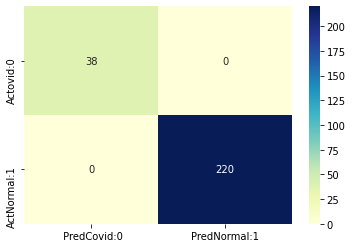

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=[' PredCovid:0', 'PredNormal:1'], 
                                 index=['Actovid:0', 'ActNormal:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       220

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [ ]:
Precision = TP / float(TP + FP)
Sensitivity = TP / float(TP + FN)
Specificity = TN / (TN + FP)
false_positive_rate = FP / float(FP + TN)
F1_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)

print('Precision : {0:0.6f}'.format(Precision))
print('Sensitivity : {0:0.6f}'.format(Sensitivity))
print('Specificity : {0:0.6f}'.format(Specificity))
print('F1_score : {0:0.6f}'.format(F1_score))
print('False Positive Rate : {0:0.6f}'.format(false_positive_rate))

Precision : 1.000000
Sensitivity : 1.000000
Specificity : 1.000000
F1_score : 1.000000
False Positive Rate : 0.000000


ROC AUC : 1.000000


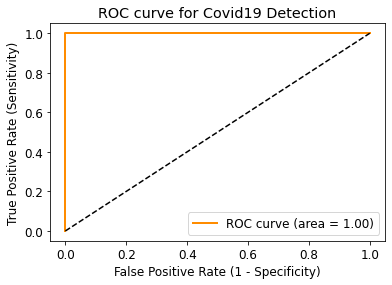

In [ ]:
# plot ROC Curve
# compute ROC AUC

from sklearn.metrics import roc_auc_score


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.6f}'.format(ROC_AUC))



plt.figure(figsize=(6,4))

plt.plot(fpr, tpr,color = 'darkorange',label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Covid19 Detection')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

Average precision-recall score: 1.00


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

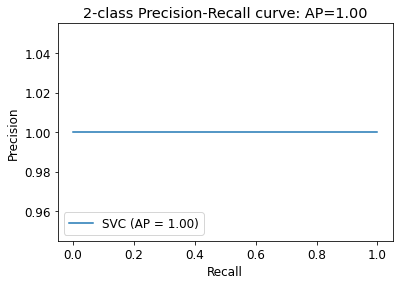

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(sigmoid_svc1, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=5, shuffle=True, random_state=0)


sigmoid_svcKfold=SVC(kernel='sigmoid', C=1.0) 

Sigmoid_scores = cross_val_score(sigmoid_svcKfold, Featuredf,Targetclass, cv=kfold)

In [ ]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(Sigmoid_scores))


Stratified cross-validation scores with linear kernel:

[0.9496124  0.95736434 0.96498054 0.95719844 0.98054475]
